##  Volume of water and tracer mass upwelled onto the shelf

In [1]:
#import gsw as sw # Gibbs seawater package

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gspec
%matplotlib inline

from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import sys

import canyon_tools.readout_tools as rout 
import canyon_tools.metrics_tools as mpt

In [2]:
sns.set_context('paper')
sns.set_style('white')

In [10]:
# Constants and scales
L = 6400.0 # canyon length
R = 5000.0 # Upstream radius of curvature
g = 9.81 # accel. gravity
Wsb = 13000 # Width at shelf break
Hs = 147.5 # Shelf break depth
s = 0.005 # shelf slope 
W = 8300 # mid-length width
Hh=97.5 # head depth
# NOTE: The default values of all functions correspond to the base case

def Dh(f=9.66E-4,L=6400.0,N=5.5E-3):
    '''Vertical scale Dh'''
    return((f*L)/(N))
    
def Ro(U=0.37,f=9.66E-4,R=5000.0):
    '''Rossby number using radius of curvature as length scale'''
    return(U/(f*R))

def F(Ro):
    '''Function that estimates the ability of the flow to follow isobaths'''
    return(Ro/(0.9+Ro))

def Bu(N=5.5E-3,f=9.66E-5,L=6400.0,Hs=150.0):
    '''Burger number'''
    return(N*Hs/(f*L))

def RossbyRad(N=5.5E-3,Hs=150.0,f=9.66E-4):
    '''1st Rossby radius of deformation'''
    return(N*Hs/f)



In [3]:
#Exp
CGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc' 
CGridOut = Dataset(CGrid)

CGridNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/gridGlob.nc' 
CGridNoCOut = Dataset(CGridNoC)

State = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/stateGlob.nc' 
StateNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/stateGlob.nc' 

In [4]:
# General input

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 
numTr = 22 # number of tracers in total (CNT =22, 3D = 4, total = 19)

rc = CGridNoCOut.variables['RC']
dxf = CGridNoCOut.variables['dxF']
xc = rout.getField(CGridNoC, 'XC') # x coords tracer cells
yc = rout.getField(CGridNoC, 'YC') # y coords tracer cells

rA = rout.getField(CGridNoC, 'rA') 

drF = CGridNoCOut.variables['drF'] # vertical distance between faces
drC = CGridNoCOut.variables['drC'] # vertical distance between centers

hFacC = rout.getField(CGridNoC, 'HFacC')
mask_NoC = rout.getMask(CGridNoC, 'HFacC')



times = np.arange(0,nt,1)

#print(drC[:])
#print(np.shape(drC))

In [5]:
import canyon_records 
import nocanyon_records

records = canyon_records.main()
recordsNoC = nocanyon_records.main()

In [6]:
ii=0
for rec in records:
    print(ii,rec.name)
    ii=ii+1
    
select_rec=[0,2,10,14,5,7,17]
labels = ['Base case',
          '$10^{-3} $m$^2$s$^{-1}$',
          '$10^{-3}$, $10^{-5} $m$^2$s$^{-1}$',
          '$10^{-2}$, $10^{-5} $m$^2$s$^{-1}$',
          'Lower $N$',
          'Lower $f$',
          'Lowest $U$']
colors = ['0.4','k','k','k','0.4','0.4','0.6']
line_sty = ['-','-','--',':','--',':','-']

0 CNTDIFF_run38
1 CNTDIFF_run37
2 CNTDIFF_run36
3 CNTDIFF_run45
4 CNTDIFF_run73
5 CNTDIFF_run75
6 CNTDIFF_run67
7 CNTDIFF_run51
8 CNTDIFF_run69
9 CNTDIFF_run71
10 3DVISC_run01
11 3DVISC_run02
12 3DVISC_run03
13 3DVISC_run04
14 3DVISC_run06
15 LOW_BF_run01
16 LOWER_BF_run01
17 LOWEST_BF_run01
18 LOWEST_BF_run03
19 LOWEST_BF_run05
20 LOWEST_BF_run07
21 LOWEST_BF_run11
22 3DVISC_run05


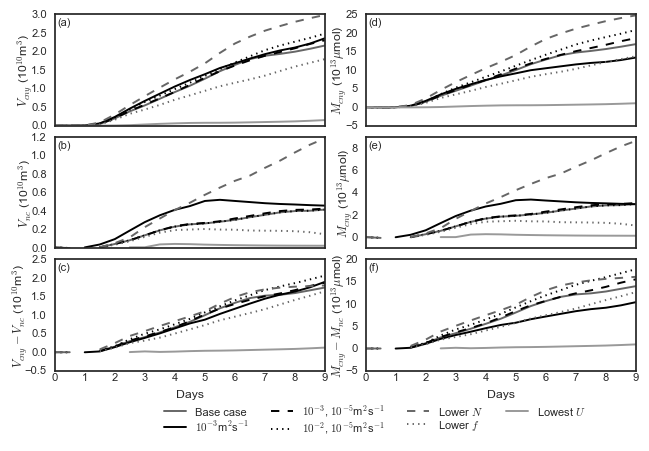

In [7]:
plt.rcParams['font.size'] = 8.0
f = plt.figure(figsize = (7.5,4.6)) # 190mm = 7.5in, 115cm = 4.52in

gs = gspec.GridSpec(1, 2,wspace=0.15)
gs1 = gspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[0,0],hspace=0.1)
gs2 = gspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[0,1],hspace=0.1)

ax0 = plt.subplot(gs1[0,0],xticks=[])
ax1 = plt.subplot(gs1[1,0],xticks=[])
ax2 = plt.subplot(gs1[2,0])
ax3 = plt.subplot(gs2[0,0],xticks=[])
ax4 = plt.subplot(gs2[1,0],xticks=[])
ax5 = plt.subplot(gs2[2,0])

jj = 0

for ind in select_rec:
    file = ('/ocean/kramosmu/MITgcm/TracerExperiments/%s/HCW_TrMass_%s%s.csv' %(records[ind].exp_code,
                                                                                records[ind].exp_code,
                                                                                records[ind].run_num))
    fileNoC = ('/ocean/kramosmu/MITgcm/TracerExperiments/%s/HCW_TrMass_%s%s.csv' %(recordsNoC[ind].exp_code,
                                                                                   recordsNoC[ind].exp_code,
                                                                                   recordsNoC[ind].run_num))
    dfcan = pd.read_csv(file)
    dfnoc = pd.read_csv(fileNoC)
    
    ax0.plot(np.arange(0,19,1)/2.0,
             (dfcan['HCW'][0:19])/1E10,
             line_sty[jj],color=colors[jj],
             label=labels[jj])
    
    ax3.plot(np.arange(0,19,1)/2.0,
             (dfcan['TrMassHCW'][0:19]-dfnoc['TrMassHCW'][0])/1E13,
             line_sty[jj],
             color=colors[jj],label=labels[jj])
    
    ax1.plot(np.arange(0,19,1)/2.0,
             (dfnoc['HCW'][0:19])/1E10,
             line_sty[jj],color=colors[jj],
             label=labels[jj])
    
    ax4.plot(np.arange(0,19,1)/2.0,
             (dfnoc['TrMassHCW'][0:19]-dfnoc['TrMassHCW'][0])/1E13,
             line_sty[jj],
             color=colors[jj],label=labels[jj])
    
    ax2.plot(np.arange(0,19,1)/2.0,
             (dfcan['HCW'][0:19]-dfnoc['HCW'][0:19])/1E10,
             line_sty[jj],color=colors[jj],
             label=labels[jj])
    
    ax5.plot(np.arange(0,19,1)/2.0,
             (dfcan['TrMassHCW'][0:19]-dfnoc['TrMassHCW'][0:19])/1E13,
             line_sty[jj],
             color=colors[jj],label=labels[jj])
    jj=jj+1

ax0.text(0.01,0.90,'(a)',transform=ax0.transAxes)
ax1.text(0.01,0.90,'(b)',transform=ax1.transAxes)    
ax2.text(0.01,0.90,'(c)',transform=ax2.transAxes)
ax3.text(0.01,0.90,'(d)',transform=ax3.transAxes)    
ax4.text(0.01,0.90,'(e)',transform=ax4.transAxes)
ax5.text(0.01,0.90,'(f)',transform=ax5.transAxes)    


ax0.set_ylabel('$V_{cny}$ (10$^{10}$m$^3$)',labelpad=-2)
ax1.set_ylabel('$V_{nc}$ (10$^{10}$m$^3$)',labelpad=-2)
ax2.set_ylabel('$V_{cny}-V_{nc}$ (10$^{10}$m$^3$)',labelpad=-3)
ax2.set_xlabel('Days')

ax3.set_ylabel('$M_{cny}$ (10$^{13}$$\mu$mol)',labelpad=-2)
ax4.set_ylabel('$M_{cny}$ (10$^{13}$$\mu$mol)',labelpad=-2)
ax5.set_ylabel('$M_{cny}-M_{nc}$ (10$^{13}$$\mu$mol)',labelpad=-2)
ax5.set_xlabel('Days')

ax2.legend(bbox_to_anchor=(2,-0.2),ncol=4,labelspacing=0.1)

ax5.tick_params(axis='x', pad=1)
ax2.tick_params(axis='x', pad=1)


#plt.savefig('fig_HCW_TrMass_CanNoC.eps',format='eps',bbox_inches='tight')


In [8]:
print ("\t".join(['run name', 'Total HCW', 'CanyonHCW', 'CoastalHCW',  'Total TrMass', 'CanyonTrMass', 'CoastalTrMass']))

select_rec = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
for ind in select_rec:
    
    file = ('/ocean/kramosmu/MITgcm/TracerExperiments/%s/HCW_TrMass_%s%s.csv' %(records[ind].exp_code,
                                                                                records[ind].exp_code,
                                                                                records[ind].run_num))
    fileNoC = ('/ocean/kramosmu/MITgcm/TracerExperiments/%s/HCW_TrMass_%s%s.csv' %(recordsNoC[ind].exp_code,
                                                                                   recordsNoC[ind].exp_code,
                                                                                   recordsNoC[ind].run_num))
    dfcan = pd.read_csv(file)
    dfnoc = pd.read_csv(fileNoC)
    
  
    print ("%s\t%s" % ((records[ind].name), 
         "\t".join(['%.3e\t%.3f\t\t%.3f\t\t%.3e\t%.3f\t\t%.3f\t' % (dfcan['HCW'][18],
                                                              (dfcan['HCW'][18]-dfnoc['HCW'][18])/dfcan['HCW'][18],
                                                              dfnoc['HCW'][18]/dfcan['HCW'][18],
                                                              dfcan['TrMassHCW'][18],
                                                              (dfcan['TrMassHCW'][18]-dfnoc['TrMassHCW'][18])/dfcan['TrMassHCW'][18],
                                                              dfnoc['TrMassHCW'][18]/dfcan['TrMassHCW'][18])])))



run name	Total HCW	CanyonHCW	CoastalHCW	Total TrMass	CanyonTrMass	CoastalTrMass
CNTDIFF_run38	2.160e+10	0.807		0.193		1.704e+14	0.821		0.179	
CNTDIFF_run37	2.164e+10	0.859		0.141		1.611e+14	0.865		0.135	
CNTDIFF_run36	2.355e+10	0.805		0.195		1.344e+14	0.775		0.225	
CNTDIFF_run45	1.667e+10	0.908		0.092		1.276e+14	0.912		0.088	
CNTDIFF_run73	9.438e+09	0.895		0.105		7.098e+13	0.897		0.103	
CNTDIFF_run75	2.984e+10	0.603		0.397		2.481e+14	0.649		0.351	
CNTDIFF_run67	2.218e+10	0.782		0.218		1.758e+14	0.799		0.201	
CNTDIFF_run51	1.794e+10	0.916		0.084		1.378e+14	0.919		0.081	
CNTDIFF_run69	1.969e+10	0.871		0.129		1.532e+14	0.879		0.121	
CNTDIFF_run71	1.421e+10	0.900		0.100		1.077e+14	0.902		0.098	
3DVISC_run01	2.301e+10	0.814		0.186		1.867e+14	0.832		0.168	
3DVISC_run02	2.161e+10	0.802		0.198		1.718e+14	0.817		0.183	
3DVISC_run03	2.293e+10	0.818		0.182		1.848e+14	0.835		0.165	
3DVISC_run04	2.148e+10	0.806		0.194		1.696e+14	0.820		0.180	
3DVISC_run06	2.482e+10	0.832		0.168		2.086e+14	0.854		0.

In [17]:
print ("\t".join(['$Ro$&','$N_o$&','$\kappa_{can}$&', 'Total HCW $10^{10}$ m$^3$&', 'CanyonHCW&',  'TotTrMassHCW $10^{14}$ $\mu$Mm$^3$&', 'CanyonTrMassHCW&','TotalTrMass $10^{14}$ $\mu$Mm$^3$&', 'CanyonTrMass ' ]))

select_rec = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
for ind in select_rec:
    
    file = ('/ocean/kramosmu/MITgcm/TracerExperiments/%s/HCW_TrMass_%s%s.csv' %(records[ind].exp_code,
                                                                                records[ind].exp_code,
                                                                                records[ind].run_num))
    fileNoC = ('/ocean/kramosmu/MITgcm/TracerExperiments/%s/HCW_TrMass_%s%s.csv' %(recordsNoC[ind].exp_code,
                                                                                   recordsNoC[ind].exp_code,
                                                                                   recordsNoC[ind].run_num))
    dfcan = pd.read_csv(file)
    dfnoc = pd.read_csv(fileNoC)
    
  
    print ("\t".join(['%0.3f\t&%0.2e\t&%0.1e\t&%.3f\t&%.3f\t\t&%.3f\t\t&%.3f\t&%.3f\t\t&%.3f\t ' % (Ro(records[ind].u,
                                                                                                       records[ind].f,R),
                                                                                                    records[ind].N,
                                                                                                    records[ind].kv,
                                                                                                    dfcan['HCW'][18]/1E10,
                                                                                                    (dfcan['HCW'][18]-dfnoc['HCW'][18])/dfcan['HCW'][18],
                                                                                                    dfcan['TrMassHCW'][18]/1E14,
                                                                                                    (dfcan['TrMassHCW'][18]-dfnoc['TrMassHCW'][18])/dfcan['TrMassHCW'][18],
                                                                                                    (dfcan['TotTrMassTr1'][18]-dfnoc['TotTrMassTr1'][0])/1E14,
                                                                                                    (dfcan['TotTrMassTr1'][18]-dfnoc['TotTrMassTr1'][18])/(dfcan['TotTrMassTr1'][18]-dfnoc['TotTrMassTr1'][0]))]))
                                                              



$Ro$&	$N_o$&	$\kappa_{can}$&	Total HCW $10^{10}$ m$^3$&	CanyonHCW&	TotTrMassHCW $10^{14}$ $\mu$Mm$^3$&	CanyonTrMassHCW&	TotalTrMass $10^{14}$ $\mu$Mm$^3$&	CanyonTrMass 
0.741	&0.005	&1.0e-05	&2.160	&0.807		&1.704		&0.821	&1.031		&0.313	 
0.741	&0.005	&1.0e-04	&2.164	&0.859		&1.611		&0.865	&1.048		&0.317	 
0.741	&0.005	&1.0e-03	&2.355	&0.805		&1.344		&0.775	&1.194		&0.320	 
0.741	&0.006	&1.0e-05	&1.667	&0.908		&1.276		&0.912	&0.843		&0.246	 
0.741	&0.007	&1.0e-05	&0.944	&0.895		&0.710		&0.897	&0.666		&0.169	 
0.741	&0.004	&1.0e-05	&2.984	&0.603		&2.481		&0.649	&1.379		&0.407	 
0.716	&0.005	&1.0e-05	&2.218	&0.782		&1.758		&0.799	&1.041		&0.325	 
0.932	&0.005	&1.0e-05	&1.794	&0.916		&1.378		&0.919	&0.974		&0.239	 
0.833	&0.005	&1.0e-05	&1.969	&0.871		&1.532		&0.879	&1.000		&0.273	 
1.119	&0.005	&1.0e-05	&1.421	&0.900		&1.077		&0.902	&0.929		&0.187	 
0.741	&0.005	&1.0e-03	&2.301	&0.814		&1.867		&0.832	&1.158		&0.389	 
0.741	&0.005	&1.0e-04	&2.161	&0.802		&1.718		&0.817	&1.072		&0.339	 
0.7

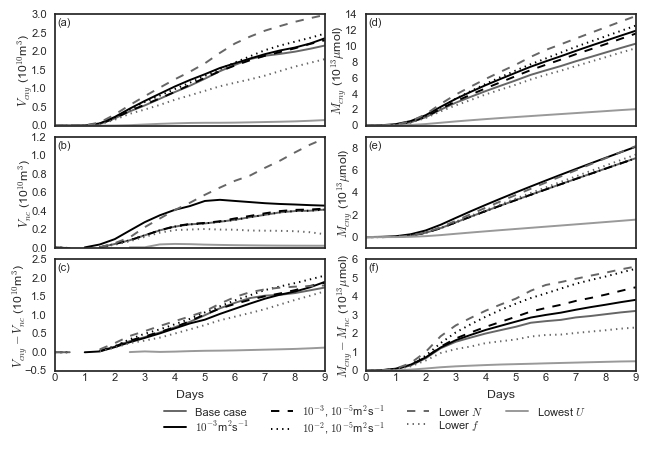

In [31]:
plt.rcParams['font.size'] = 8.0
f = plt.figure(figsize = (7.5,4.6)) # 190mm = 7.5in, 115cm = 4.52in

gs = gspec.GridSpec(1, 2,wspace=0.15)
gs1 = gspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[0,0],hspace=0.1)
gs2 = gspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[0,1],hspace=0.1)

ax0 = plt.subplot(gs1[0,0],xticks=[])
ax1 = plt.subplot(gs1[1,0],xticks=[])
ax2 = plt.subplot(gs1[2,0])
ax3 = plt.subplot(gs2[0,0],xticks=[])
ax4 = plt.subplot(gs2[1,0],xticks=[])
ax5 = plt.subplot(gs2[2,0])

jj = 0

for ind in select_rec:
    file = ('/ocean/kramosmu/MITgcm/TracerExperiments/%s/HCW_TrMass_%s%s.csv' %(records[ind].exp_code,
                                                                                records[ind].exp_code,
                                                                                records[ind].run_num))
    fileNoC = ('/ocean/kramosmu/MITgcm/TracerExperiments/%s/HCW_TrMass_%s%s.csv' %(recordsNoC[ind].exp_code,
                                                                                   recordsNoC[ind].exp_code,
                                                                                   recordsNoC[ind].run_num))
    dfcan = pd.read_csv(file)
    dfnoc = pd.read_csv(fileNoC)
    
    ax0.plot(np.arange(0,19,1)/2.0,
             (dfcan['HCW'][0:19])/1E10,
             line_sty[jj],color=colors[jj],
             label=labels[jj])
    
    ax3.plot(np.arange(0,19,1)/2.0,
             (dfcan['TotTrMassTr1'][0:19]-dfnoc['TotTrMassTr1'][0])/1E13,
             line_sty[jj],
             color=colors[jj],label=labels[jj])
    
    ax1.plot(np.arange(0,19,1)/2.0,
             (dfnoc['HCW'][0:19])/1E10,
             line_sty[jj],color=colors[jj],
             label=labels[jj])
    
    ax4.plot(np.arange(0,19,1)/2.0,
             (dfnoc['TotTrMassTr1'][0:19]-dfnoc['TotTrMassTr1'][0])/1E13,
             line_sty[jj],
             color=colors[jj],label=labels[jj])
    
    ax2.plot(np.arange(0,19,1)/2.0,
             (dfcan['HCW'][0:19]-dfnoc['HCW'][0:19])/1E10,
             line_sty[jj],color=colors[jj],
             label=labels[jj])
    
    ax5.plot(np.arange(0,19,1)/2.0,
             (dfcan['TotTrMassTr1'][0:19]-dfnoc['TotTrMassTr1'][0:19])/1E13,
             line_sty[jj],
             color=colors[jj],label=labels[jj])
    jj=jj+1

ax0.text(0.01,0.90,'(a)',transform=ax0.transAxes)
ax1.text(0.01,0.90,'(b)',transform=ax1.transAxes)    
ax2.text(0.01,0.90,'(c)',transform=ax2.transAxes)
ax3.text(0.01,0.90,'(d)',transform=ax3.transAxes)    
ax4.text(0.01,0.90,'(e)',transform=ax4.transAxes)
ax5.text(0.01,0.90,'(f)',transform=ax5.transAxes)    


ax0.set_ylabel('$V_{cny}$ (10$^{10}$m$^3$)',labelpad=-2)
ax1.set_ylabel('$V_{nc}$ (10$^{10}$m$^3$)',labelpad=-2)
ax2.set_ylabel('$V_{cny}-V_{nc}$ (10$^{10}$m$^3$)',labelpad=-3)
ax2.set_xlabel('Days')

ax3.set_ylabel('$M_{cny}$ (10$^{13}$$\mu$mol)',labelpad=-2)
ax4.set_ylabel('$M_{cny}$ (10$^{13}$$\mu$mol)',labelpad=-2)
ax5.set_ylabel('$M_{cny}-M_{nc}$ (10$^{13}$$\mu$mol)',labelpad=-2)
ax5.set_xlabel('Days')

ax2.legend(bbox_to_anchor=(2,-0.2),ncol=4,labelspacing=0.1)

ax5.tick_params(axis='x', pad=1)
ax2.tick_params(axis='x', pad=1)


#plt.savefig('fig_HCW_TrMass_CanNoC.eps',format='eps',bbox_inches='tight')


In [34]:
print ("\t".join(['run name', 'Total HCW', 'CanyonHCW', 'CoastalHCW',  'Total TrMass', 'CanyonTrMass', 'CoastalTrMass']))

select_rec = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
for ind in select_rec:
    
    file = ('/ocean/kramosmu/MITgcm/TracerExperiments/%s/HCW_TrMass_%s%s.csv' %(records[ind].exp_code,
                                                                                records[ind].exp_code,
                                                                                records[ind].run_num))
    fileNoC = ('/ocean/kramosmu/MITgcm/TracerExperiments/%s/HCW_TrMass_%s%s.csv' %(recordsNoC[ind].exp_code,
                                                                                   recordsNoC[ind].exp_code,
                                                                                   recordsNoC[ind].run_num))
    dfcan = pd.read_csv(file)
    dfnoc = pd.read_csv(fileNoC)
    
  
    print ("%s\t%s" % ((records[ind].name), 
         "\t".join(['%.3e\t%.3f\t\t%.3f\t\t%.3e\t%.3f\t\t%.3f\t' % (dfcan['HCW'][18],
                                                              (dfcan['HCW'][18]-dfnoc['HCW'][18])/dfcan['HCW'][18],
                                                              (dfnoc['HCW'][18])/dfcan['HCW'][18],
                                                              dfcan['TotTrMassTr1'][18]-dfnoc['TotTrMassTr1'][0],
                                                              (dfcan['TotTrMassTr1'][18]-dfnoc['TotTrMassTr1'][18])/(dfcan['TotTrMassTr1'][18]-dfnoc['TotTrMassTr1'][0]),
                                                              (dfnoc['TotTrMassTr1'][18]-dfnoc['TotTrMassTr1'][0])/(dfcan['TotTrMassTr1'][18]-dfnoc['TotTrMassTr1'][0]))])))



run name	Total HCW	CanyonHCW	CoastalHCW	Total TrMass	CanyonTrMass	CoastalTrMass
CNTDIFF_run38	2.160e+10	0.807		0.193		1.031e+14	0.313		0.687	
CNTDIFF_run37	2.164e+10	0.859		0.141		1.048e+14	0.317		0.683	
CNTDIFF_run36	2.355e+10	0.805		0.195		1.194e+14	0.320		0.680	
CNTDIFF_run45	1.667e+10	0.908		0.092		8.429e+13	0.246		0.754	
CNTDIFF_run73	9.438e+09	0.895		0.105		6.662e+13	0.169		0.831	
CNTDIFF_run75	2.984e+10	0.603		0.397		1.379e+14	0.407		0.593	
CNTDIFF_run67	2.218e+10	0.782		0.218		1.041e+14	0.325		0.675	
CNTDIFF_run51	1.794e+10	0.916		0.084		9.739e+13	0.239		0.761	
CNTDIFF_run69	1.969e+10	0.871		0.129		9.999e+13	0.273		0.727	
CNTDIFF_run71	1.421e+10	0.900		0.100		9.293e+13	0.187		0.813	
3DVISC_run01	2.301e+10	0.814		0.186		1.158e+14	0.389		0.611	
3DVISC_run02	2.161e+10	0.802		0.198		1.072e+14	0.339		0.661	
3DVISC_run03	2.293e+10	0.818		0.182		1.158e+14	0.388		0.612	
3DVISC_run04	2.148e+10	0.806		0.194		1.071e+14	0.338		0.662	
3DVISC_run06	2.482e+10	0.832		0.168		1.259e+14	0.437		0.